<a href="https://colab.research.google.com/github/FASHILA/Projek_PythonPowerBI/blob/main/Projek_Python_Fashila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eksplorasi dan Visualisasi Data**

Panggil Library Yang Dibutuhkan Pada Tahapan Analisa Ini Seperti Library Untuk Menampilkan Tabel Dan Grafik Analisa

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_excel(io='/content/drive/MyDrive/Online Retail.xlsx', sheet_name='Online Retail', engine='openpyxl')

 Lihat Jumlah Data Dan Jumlah Kolom Yang Ada Pada Dataset Ini

In [12]:
df.shape

(541909, 8)

Lihat 5 Data Pertama Dari Dataset Ini

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **Quantity Distribution**

Sekarang Kita Lihat Distribusi Data Qiantity Product Tersebut

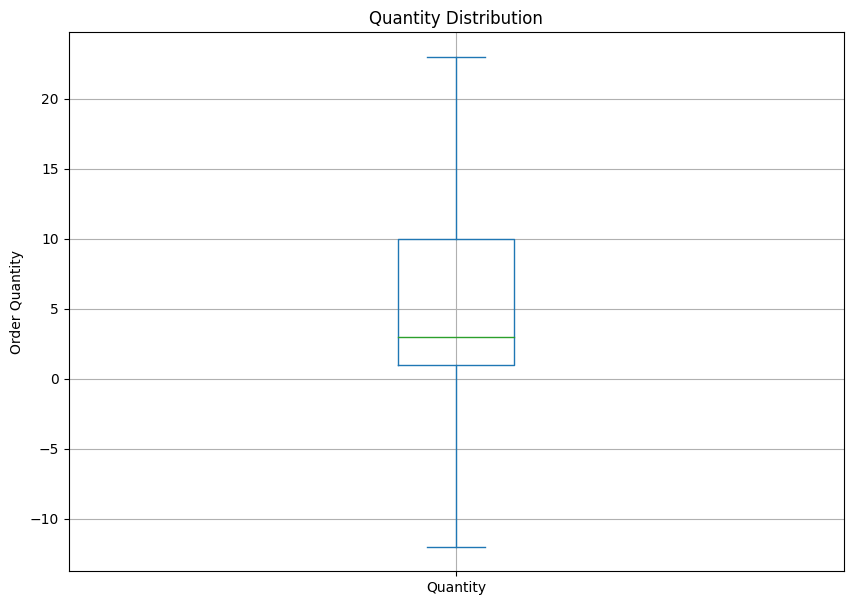

In [14]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

Lihat Informasi Dan Deskripsi Dari Kolom Quantity Ini

In [15]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


Gunakan Fungsi Filter Untuk Lihat Jumlah Data Dari Data Product Yang Quantity-Nya Hanya Besar Dari 0

In [16]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

Update Data Pada Variabel Dataset Tersebut Berdasarkan Hasil Filter Data Yang Besar Dari 0

In [17]:
df = df.loc[df['Quantity'] > 0]

## **Time-Series Number Of Orders**

Akan Melakukan Filter Data Berdasarkan Waktu Penjualan Product Tersebut. Kemudian Data Ini Kita Simpan Ke Dalam Variabel Baru (Di Group Berdasarkan Bulan (M))



In [18]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

Lihat Informasi Sebaran Data Product Berdasarkan Jumlah Product Dan Waktu Penjualan Ke Dalam Grafik

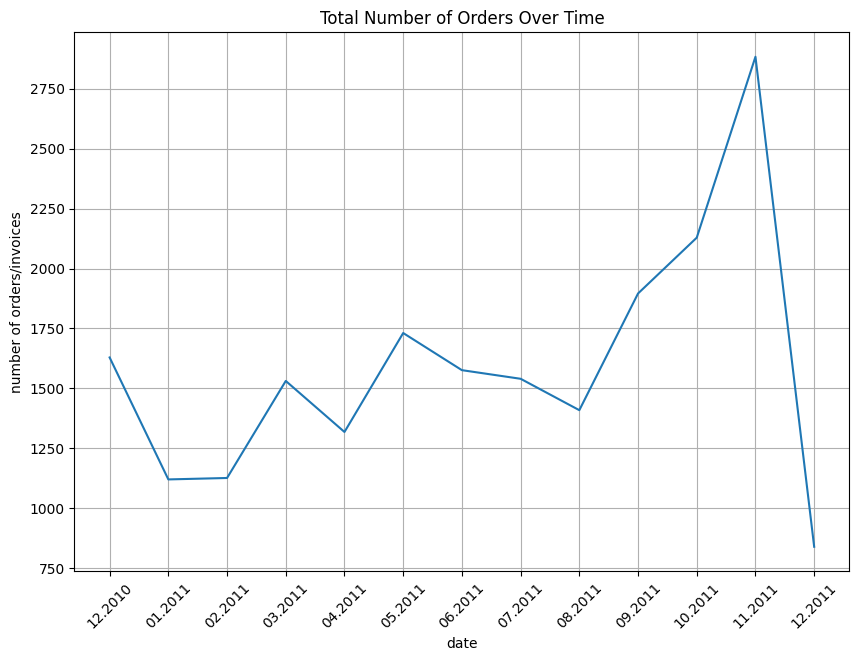

In [19]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

Filter Data Product Berdasarkan Tanggal Penjualan Yang Setelah Tanggal “2011-12-01” Sampai Saat Ini

In [20]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

Lihat Tanggal Paling Min Dan Max Dari Variabel Data Product Yang Besar Dari Tanggal “2011-12-01”

In [21]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


Cek Data Product Yang Berada Pada Tanggal “2011-12-01” Kebawah

In [22]:
df.loc[df['InvoiceDate'] < '2011-12-01'].shape

(506150, 8)

Simpan Data Ini Ke Dalam Sebuah Variabel Baru Untuk Dilakukan Proses Analisa Product Kita

In [23]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

Lakukan Grouping Terhadap Data Yang Telah Kita Filter Ini Dan Tampilkan Data Tersebut Dan Group Berdasarkan Bulan (M)

In [24]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

Lihat Sebaran Terdapat Data Yang Telah Kita Filter Ini Ke Dalam Grafik

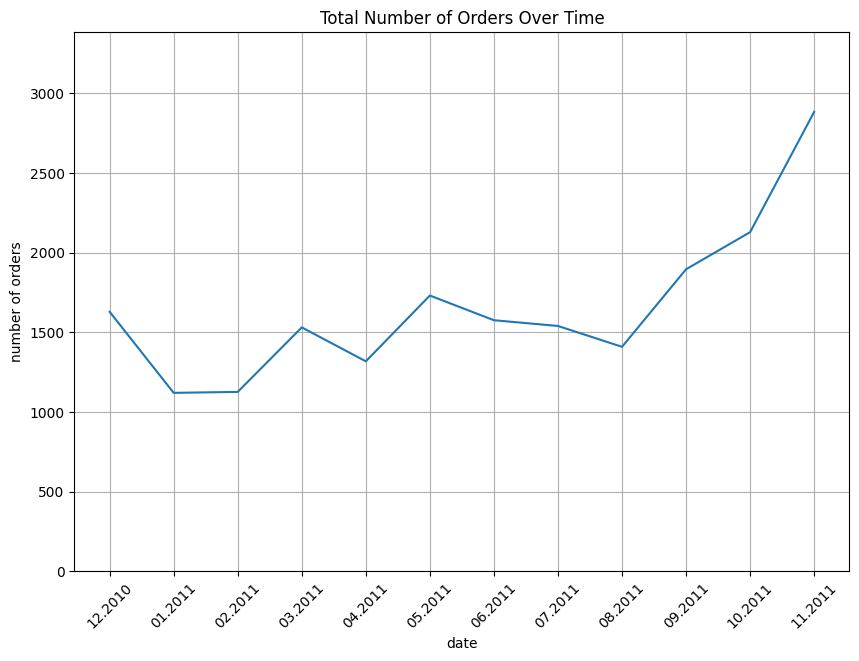

In [25]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values)+500])

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

## **Time-Series Revenue**

Sekarang Kita Akan Menghitung Dan Menganalisa Keuntungan Product Berdasarkan Waktu. Jadi Pertama – Tama Kita Hitung Dulu Total Penjualan Product

In [26]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

Selanjutnya Filter Dan Hitung Data Tersebut Berdasarkan Tanggal Yang Di Group Berdasarkan Bulan Setiap Penjualan Product

In [27]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

Liat Sebaran Dari Penjualan Product Tersebut Ke Dalam Grafik

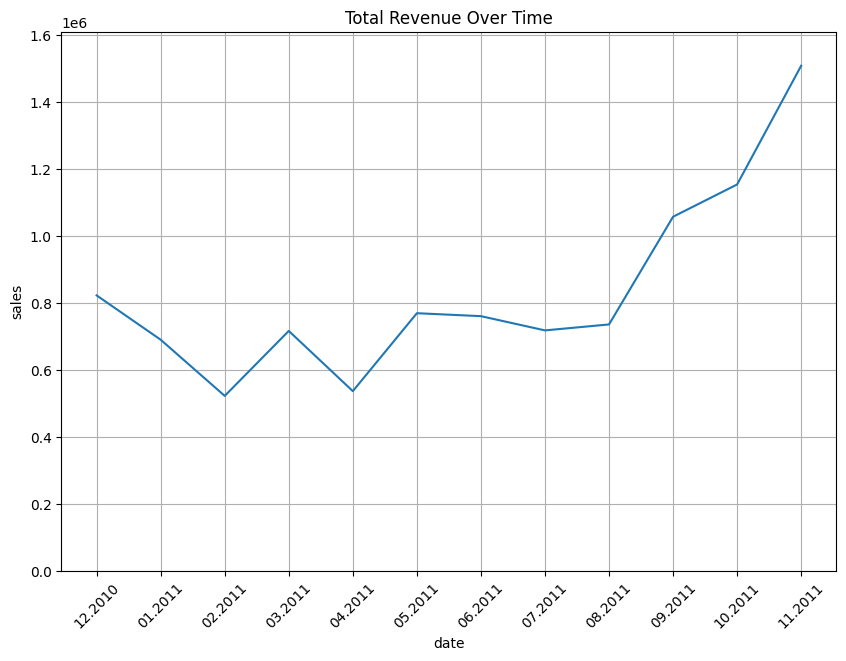

In [28]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)),
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index],
    rotation=45
)

plt.show()

## **Time-Series Repeat Customers**

Sekarang Kita Akan Lihat Data Customer Yang Melakukan Pembelian Berulang Tiap Waktunya. Pertama – Tama Kita Group Data Tersebut Berdasarkan Nomor Dan Tanggal Invoice Lalu Hitung Total Pembelian Product Tersebut

In [30]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

Lihat Informasi Variabel Data Yang Telah Kita Group Tersebut

In [31]:
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


Group Lagi Data Tersebut Untuk Melihat Banyaknya Transaksi Unik Tiap Bulannya

In [32]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

Lihat Banyaknya Transaksi Keseluruhan Data Tersebut Berdasarkan Bulan Dan Customer

In [33]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

Lihat Persentasi Pencapaian Product Yang Dibeli Berulang Oleh Customer Berdasarkan Bulan

In [34]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

Lihat Perbandingan Antara Data Keseluruhan Constumer Dengan Banyaknya Pembelian Oleh Customer Yang Sama Atau Berulang

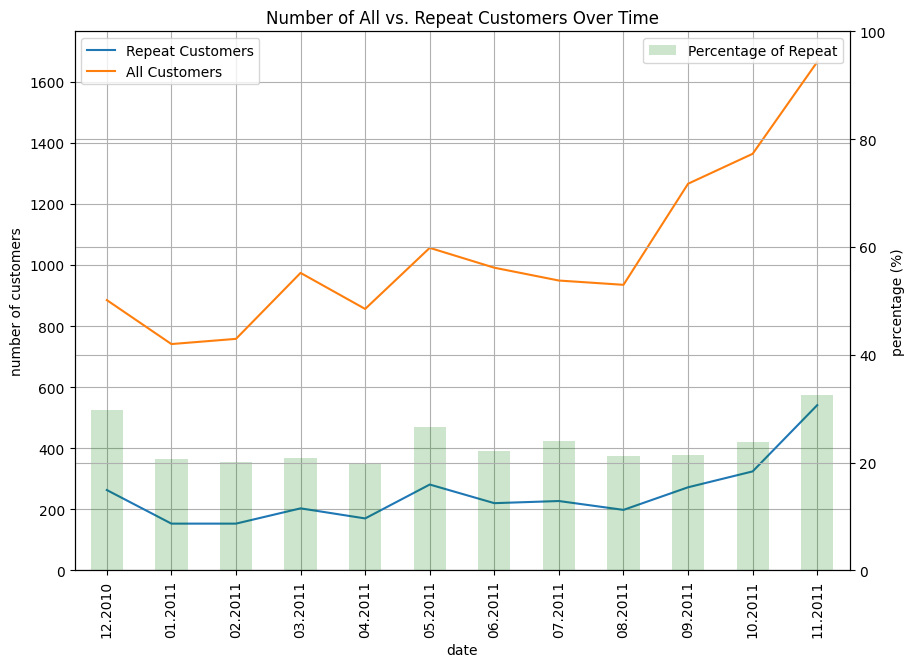

In [35]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=45
)

plt.show()

## **Revenue From Repeat Customers**

Sekarang Menghitung Dan Menganalisa Banyaknya Keuntungan Yang Didapat Dari Pembelian Customer Yang Berulang. Pertama – Tama Kita Lakukan Grouping Terhadap Data Tersebut

In [36]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

Hitung Persentase Setiap Product Yang Terjual Oleh Consumen Yang Sama

In [37]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

Lihat Perbandingan Antara Keuntungan Seluruh Product Dengan Keuntungan Yang Dihasilkan Oleh Customer Berulang

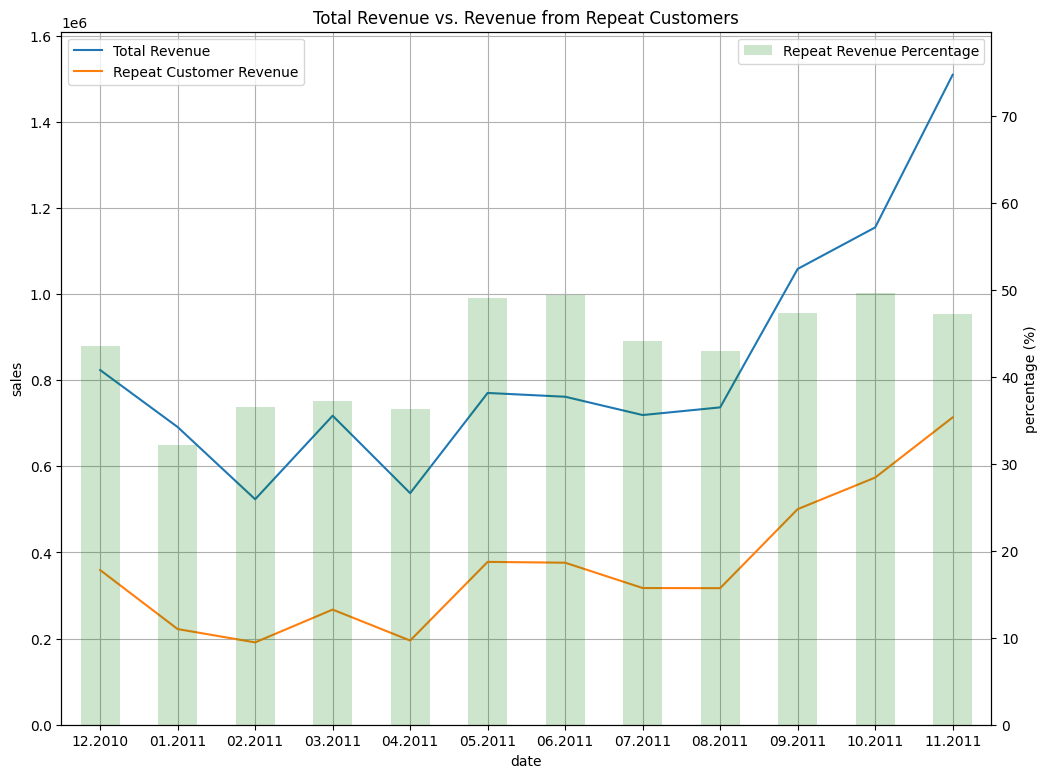

In [38]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

Lihat Product Yang Populer Dari Waktu Ke Waktu. Pertama – Tama Kita Lakukan Filter Terhadap Product Kita Dari Waktu Ke Waktu

In [39]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

Ranking Setiap Product Yang Populer Tersebut Berdasarkan Total Penjualan

In [40]:
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()
last_month_sorted_df

,StockCode,Quantity
0,23084,14954
1,84826,12551
2,22197,12460
3,22086,7908
4,85099B,5909
...,...,...
2941,84549,1
2942,84527,1
2943,90082B,1
2944,90082D,1


Ambil 5 Product Populer Untuk Sebagai Acuan Terhadap Penjualan Product Tersebut Dari Waktu Ke Waktu

In [41]:
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

Ubah Tampilan Perbandingan Tersebut Menjadi Tabel Sehingga Lebih Mudah Untuk Melakukan Analisa Terhadap Product Tersebut

In [44]:
trending_itmes_df = date_item_df.reset_index().pivot(index='InvoiceDate', columns='StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


Lakukan Perbandingan Terhadap Ke 5 Product Tersebut Ke Dalam Grafik

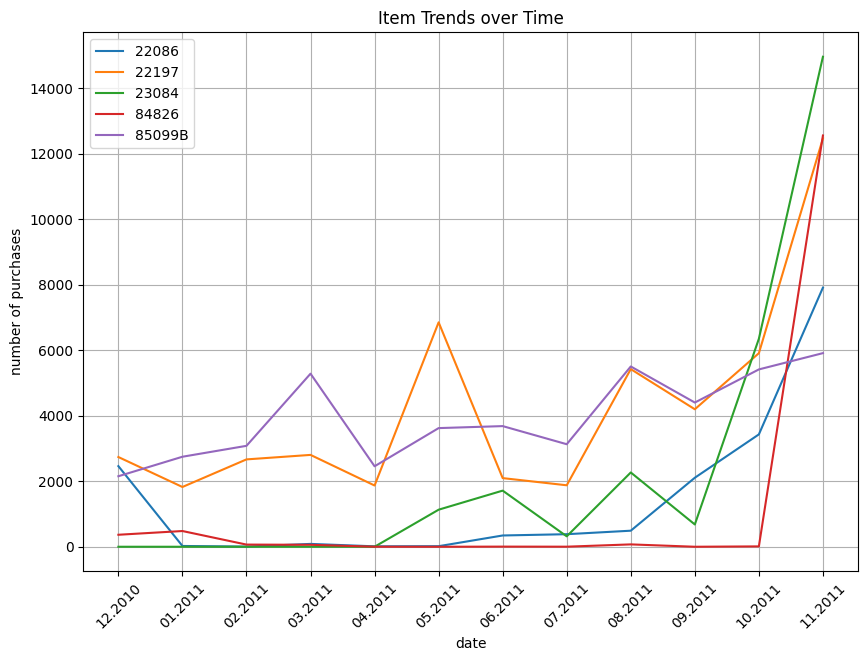

In [45]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)),
    [x.strftime('%m.%Y') for x in trending_itmes_df.index],
    rotation=45
)

plt.show()

# **Clasification and Regression**

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [81]:
# Clean data
cleaned_data = df.dropna(subset=['CustomerID', 'Quantity', 'UnitPrice', 'Country'])

In [82]:
# Select a subset of data to avoid too many unique classes
subset_data = cleaned_data[cleaned_data['Country'].isin(cleaned_data['Country'].value_counts().index[:2])]

In [83]:
# Classification data
X = subset_data[['CustomerID', 'Quantity']]
y = subset_data['Country']

In [84]:
# Encode target labels
y = pd.factorize(y)[0]

In [85]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# KNN Classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

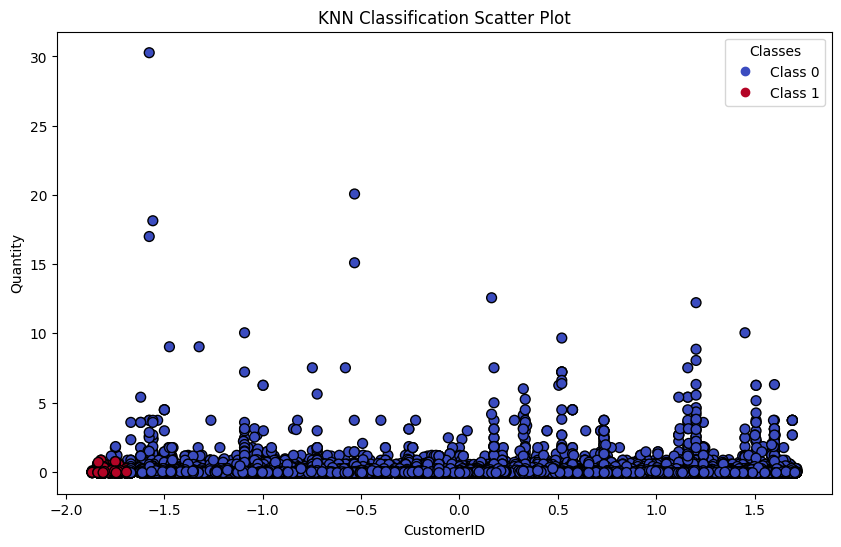

In [88]:
# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.title('KNN Classification Scatter Plot')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'], title='Classes')
plt.show()

In [107]:
# Menangani nilai yang hilang
df = df.dropna(subset=['CustomerID'])  # Menghapus baris dengan CustomerID yang hilang
df['Description'].fillna('No Description', inplace=True)  # Mengisi deskripsi yang hilang

In [108]:
# Membuat fitur baru: TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [109]:
# Encode 'Country' untuk tugas klasifikasi
label_encoder = LabelEncoder()
df['CountryEncoded'] = label_encoder.fit_transform(df['Country'])

In [110]:
 # Mempersiapkan data untuk klasifikasi: Memprediksi apakah transaksi terjadi di Inggris
df['IsUK'] = (df['Country'] == 'United Kingdom').astype(int)
X_classification = df[['Quantity', 'UnitPrice', 'TotalPrice', 'CountryEncoded']]
y_classification = df['IsUK']

In [111]:
# Membagi data untuk klasifikasi
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [112]:
# Melatih model Regresi Logistik untuk klasifikasi
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_cls, y_train_cls)

LogisticRegression(max_iter=1000)

In [113]:
# Mempersiapkan data untuk regresi: Memprediksi total harga transaksi
X_regression = df[['Quantity', 'UnitPrice', 'CountryEncoded']]
y_regression = df['TotalPrice']

In [114]:
# Membagi data untuk regresi
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [115]:
# Melatih model Regresi Linear untuk regresi
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [116]:
# Memprediksi dan mengevaluasi model regresi
y_pred_reg = reg.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)

In [117]:
# Menampilkan hasil
print("Laporan Klasifikasi:\n", classification_report_cls)
print("Mean Squared Error untuk Regresi:", mse_reg)

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8318
           1       1.00      1.00      1.00     67806

    accuracy                           1.00     76124
   macro avg       1.00      1.00      1.00     76124
weighted avg       1.00      1.00      1.00     76124

Mean Squared Error untuk Regresi: 5229.194861516904


# **K-Means Clustering**

In [92]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## **Preprocessing**

Menghapus baris tanpa CustomerID dan menghitung total harga.

In [93]:
df = df.dropna(subset=['CustomerID'])

Mengubah InvoiceDate menjadi datetime

In [94]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Buat kolom total price

In [95]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## **Feature Engineering**
Membuat fitur RFM (Recency, Frequency, Monetary)

In [96]:
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Frequency
    'Quantity': 'sum',       # Quantity
    'TotalPrice': 'sum',     # Monetary
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days  # Recency
}).reset_index()

In [97]:
customer_df.columns = ['CustomerID', 'Frequency', 'Quantity', 'Monetary', 'Recency']

## **Normalize**
Menormalkan data untuk clustering.

In [98]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df[['Frequency', 'Quantity', 'Monetary', 'Recency']])

## **Elbow Method**
Tentukan jumlah Cluster dengan menggunakan elbow method

In [100]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(customer_df_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plot the elbow curve

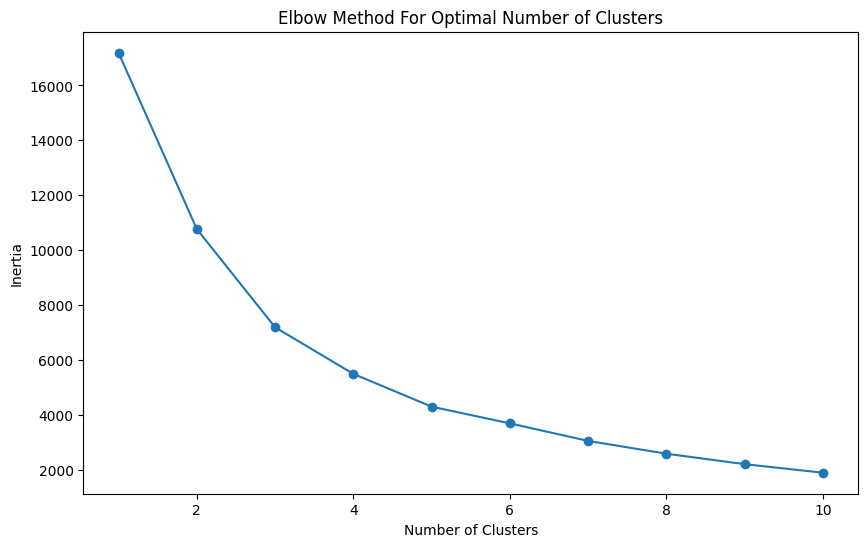

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

## **KMeans Clustering**
Melatih model KMeans dan menambahkan label kluster ke data pelanggan (e.g., 4).

In [102]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(customer_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **Visualization**
Memvisualisasikan hasil clustering.

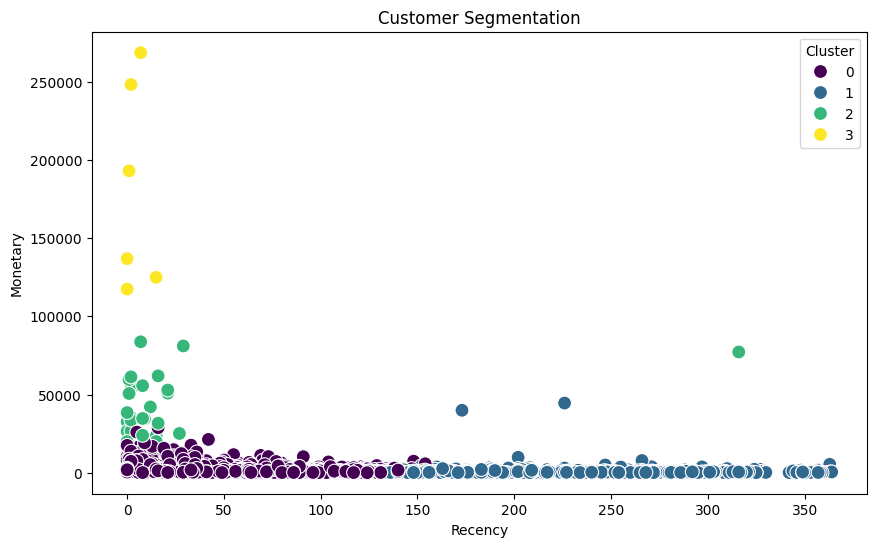

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=customer_df, palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.show()

## **Save Result**
Menyimpan hasil clustering ke file CSV.

In [104]:
customer_df.to_csv('/content/drive/MyDrive/Online Retail.xlsx', index=False)

In [105]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,TotalPrice,CountryEncoded,IsUK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,35,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,35,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,35,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,35,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,35,1


Tampilkan beberapa baris pertama dari data yang dikelompokkan

In [106]:
print(customer_df.head())

   CustomerID  Frequency  Quantity  Monetary  Recency  Cluster
0     12346.0          1     74215  77183.60      316        2
1     12347.0          6      2266   4085.18       30        0
2     12348.0          4      2341   1797.24       66        0
3     12349.0          1       631   1757.55        9        0
4     12350.0          1       197    334.40      301        1
